<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023/blob/main/Python/Python_Basic/text/PythonBasic_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第7章

## ファイルの入出力

プログラムからファイルの読み書きをするには、次の手順で行います。  

①ファイルを開く  
②ファイルに書き込む or 読み込む  
③ファイルを閉じる  

### with文を用いない場合

以下のコードを実行して、テキストファイルの作成・書き込みを行っていきましょう。

In [1]:
# 書き込む内容
text = "Ouka 75\nDenshi 99\nJosisu 95"

file = open("gakka.text",'w+')

file.write(text + "\n")

file.close()

このプログラムを実行すると、GoogleColabの同じフォルダに  
テキストファイルが作成されます。  


手順①では、組み込み関数である**`open関数`**を使用しています。  

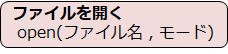  

第1引数として開くファイルの名前、第2引数として**モード**を指定します。  


**モード**は、開いたファイルをどのように操作するかを示す文字です。  
違いについては後程述べます。



`open関数`は、戻り値として開いたファイルを表すファイルオブジェクトを返します。  
ファイルオブジェクトは、開いたファイルに関する様々な属性や、操作を行うためのメソッドを持っています。

手順②では、ファイルオブジェクトが持つ**`writeメソッド`**を使って、  
開いたファイルにデータを書き込んでいます。

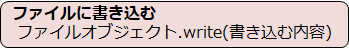  

入力された内容に改行を表すエスケープシーケンス`\n`を付けているため、  
書き込むたびに改行が行われます。

手順③では、ファイルオブジェクトの**`closeメソッド`**を使用して、  
開いたファイルを閉じます。  

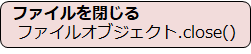

必要なファイル操作が終わったら、すぐに閉じる処理が行われるようにした方が安全です。  

### with文を用いる場合

開いたファイルを確実に閉じたい場合は、**with文**を使います。  
with文でファイルを開き、withブロックの中で開いたファイルに関する操作を行います。  
そして、withブロックが終了すると、自動的にファイルを閉じてくれます。

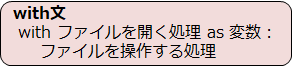  

※開く処理で返されるファイルオブジェクトが変数に代入される  
※withブロックの終了時にファイルを自動的に閉じる処理が行われる  
※処理はインデントして記述する

with文を使って、先ほどのプログラムを書き換えてみましょう。

In [2]:
# 書き込む内容
text = "Ouka 75\nDenshi 99\nJosisu 95"

with open("gakka.text",mode="w+") as f:
  f.write(text + "\n")

### モード

モードの指定方法を変更することで、微妙な変化があります。

#### r+

**"r+"**を指定すると、既存のデータを読み込んだ後、  
データの先頭から書き込み・読み込みが行えるようになります。

In [3]:
# 元の書き込み内容
text = "Ouka 75\nDenshi 99\nJosisu 95"

with open("gakka.text",mode="w+") as f:
  f.write(text + "\n")

In [4]:
# 新しく書き込む内容
new_text = "Ouka 80\nDenshi 83"

with open("gakka.text",mode="r+") as f:
  f.write(new_text + "\n")

応用化学生物学科と電子光工学科の人数が上書きされたような感じで  
書き込みが行われます。

#### w+

**"w+"**を指定すると、既存のデータを読み込んだ後、  
データの内容がすべて更新されたうえで、書き込み・読み込みが行えるようになります。

In [5]:
# 元の書き込み内容
text = "Ouka 75\nDenshi 99\nJosisu 95"

with open("gakka.text",mode="w+") as f:
  f.write(text + "\n")

In [6]:
# 新しく書き込む内容
new_text = "Ouka 80\nDenshi 83"

with open("gakka.text",mode="w+") as f:
  f.write(new_text + "\n")

応用化学生物学科と電子光工学科の人数のみ書き込みが行われます。

#### a+

**"a+"**を指定すると、既存のデータを読み込んだ後、  
データの末尾から書き込み・読み込みが行えるようになります。

In [7]:
# 元の書き込み内容
text = "Ouka 75\nDenshi 99\nJosisu 95"

with open("gakka.text",mode="w+") as f:
  f.write(text + "\n")

In [8]:
# 新しく書き込む内容
new_text = "Ouka 80\nDenshi 83"

with open("gakka.text",mode="a+") as f:
  f.write(new_text + "\n")

新しく応用化学生物学科と電子光工学科の人数が末尾に書き込まれます。

### ファイルの読み込み

今までは書き込んでばっかりだったので、読み込みを行っていきます。

#### readlineメソッド

**`readline`メソッド**を使うと、テキストファイルを一行ずつ読み込み、  
Stringとして取得することができます。

In [9]:
# 書き込み内容
text = "Ouka 75\nDenshi 99\nJosisu 95"

with open("gakka.text",mode="w+") as f:
  f.write(text + "\n")

In [10]:
# 読み込み
with open("gakka.text",mode="r+") as f:
  line = f.readline()
  # ファイルの中のテキストがなくなるまで読み込み
  while line: 
    print(line,end="")
    line = f.readline()

Ouka 75
Denshi 99
Josisu 95


ここで以前学習した**`split`メソッド**が活きてきます。  
学科とその人数を別々に読み込み、ディクショナリに格納します。

In [11]:
gakka_dic = {"Ouka":80 , "Denshi":83 , "Josisu":90}  # 2021年のデータ
print(gakka_dic)

# 2022年のデータを読み込み
with open("gakka.text",mode="r+") as f:
  line = f.readline()
  # ファイルの中のテキストがなくなるまで読み込み
  while line: 

    """
    line.split():取得した文字列を空白を区切り文字にして分ける
    line.split()[0]:学科
    line.split()[1]:人数 int型に変換している
    """
    gakka_dic[line.split()[0]] = int(line.split()[1])
    line = f.readline()

print(gakka_dic)

{'Ouka': 80, 'Denshi': 83, 'Josisu': 90}
{'Ouka': 75, 'Denshi': 99, 'Josisu': 95}


テキストファイル内のデータが多いときはこちらを用います。

#### readlinesメソッド

**`readlines`メソッド**を使うと、テキストファイルを全行読み込み、  
listとして取得することができます。

In [12]:
# 書き込み内容
text = "Ouka 75\nDenshi 99\nJosisu 95"

with open("gakka.text",mode="w+") as f:
  f.write(text)

In [13]:
with open("gakka.text",mode="r+") as f:
  lines = f.readlines()
  print(lines)

['Ouka 75\n', 'Denshi 99\n', 'Josisu 95']


改行`\n`があって気になります。  
**`f.read().splitlines()`**とすると解消されるようです。

In [14]:
with open("gakka.text",mode="r+") as f:
  lines = f.read().splitlines()
  print(lines)

['Ouka 75', 'Denshi 99', 'Josisu 95']
